# Assignment 5: Statistical Analysis (30 pt)

Use as many Python and markdown cells per question as you deem necessary. **DO NOT SUBMIT CODE THAT DOES NOT RUN.** You will lose points for code that throws errors. 

Questions 1 and 2 will use data describing various wetlands, intertidal zones, and ocean conditions in the United States from 1972-2015. This data has been adapted from [publicly available data from NASA](https://daac.ornl.gov/NACP/guides/Tidal_Wetland_Estuaries_Data.html). Note that this file uses the value `-9999` to denote missing data. This file's path is `data/tidal_wetland_estuaries.csv`.

Question 3 will be using time series data describing the proportion of electricity produced by coal in high income countries from [the World Bank](https://data.worldbank.org/indicator/EG.ELC.COAL.ZS). The path to the file is `data/coal-production.csv`.


## Question 1: t-tests (10 pt)

Using the data from `tidal_wetland_estuaries.csv`, test the hypothesis that soil organic carbon density (column name: `soc_density`) is **larger** in the East coast than the West coast with a t-test. Interpret the t-test. (5 pt)

Defend your choice of which type of t-test you used (3 pt).

Do the data meet the requirement for normal data? Why or why not? (2 pt) 

t-value: 8.797216479058864
p-value: 1.1077578800480447e-12
I used a 2 sample t-test to check the hypothesis that the carbon density is larger in the East coast than the West coast by finding the t and p values because I would be able to confirm whether or not there is a difference in the carbon densities in both locations.
This test supports the hypothesis that there is a much higher carbon density in the East coast than the West coast becasue the t-value of 8.8 and the p value is way lower than .05. This rejects a null hypothesis.
By checking the overall distribution of the data for both the East and West coasts, I see the data looks like a bell shape for both showing that this data meets the requirments for normal data.
The only concern is that the left tail of the westcoast data is a little bit larger than the right tale, but because it still looks like the shape of bell curve, I conclud that this is good data.


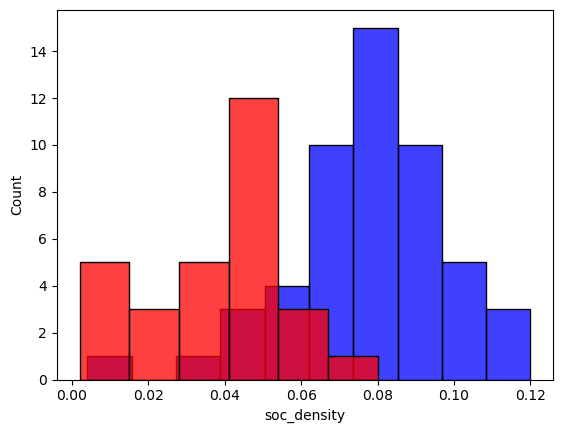

In [142]:
import pandas as pd
import seaborn as sns
import scipy.stats as stats

tidal = pd.read_csv("data/tidal_wetland_estuaries.csv")

eastCoast = tidal.loc[tidal['coast'] == 'EAST']['soc_density']
westCoast = tidal.loc[tidal['coast'] == 'WEST']['soc_density']
t, p = stats.ttest_ind(eastCoast, westCoast, equal_var=False)
print("t-value:", t)
print("p-value:", p)
print("I used a 2 sample t-test to check the hypothesis that the carbon density is larger in the East coast than the West coast by finding the t and p values because I would be able to confirm whether or not there is a difference in the carbon densities in both locations.")
print("This test supports the hypothesis that there is a much higher carbon density in the East coast than the West coast becasue the t-value of 8.8 and the p value is way lower than .05. This rejects a null hypothesis.")
sns.histplot(data=eastCoast, color='blue')
sns.histplot(data=westCoast, color='red')
print("By checking the overall distribution of the data for both the East and West coasts, I see the data looks like a bell shape for both showing that this data meets the requirments for normal data.")
print("The only concern is that the left tail of the westcoast data is a little bit larger than the right tale, but because it still looks like the shape of bell curve, I conclud that this is good data.")

## Question 2

Using the data from `tidal_wetland_estuaries.csv`, create a linear model to predict mean ocean salinity (column name: `ocean_salinity_mean`) from other environmental factors. (2 pt)

Create a model with a high R-squared value (> 0.80). All coefficients should be significant, and none should have VIF values above 5.0. (4 pt)

Interpret the summary of the model, focusing on the R-squared value and the regression coefficients. (3 pt)

Make diagnostic plots to ensure your data meets the assumptions of linear regression. The necessary functions have been imported for you. (1 pt).

<AxesSubplot:title={'center':'Residuals vs Fitted'}, xlabel='Fitted values', ylabel='Residuals'>

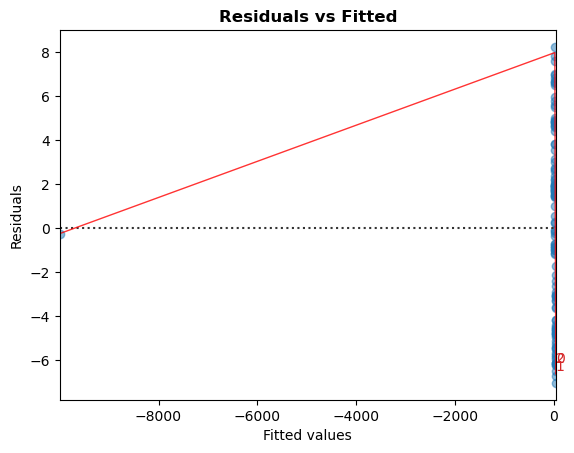

In [143]:
from utils import Linear_Reg_Diagnostic # do not change!
import statsmodels.formula.api as smf

tidal = pd.read_csv("data/tidal_wetland_estuaries.csv")
# tidalModel = smf.ols(formula = "ocean_salinity_mean",data=tidal).fit()
# oceanSal = tidal["ocean_salinity_mean"]
# autoModel = pm.auto_arima(oceanSal)
# pd.Series(autoModel.predict_in_sample())
# oceanSal.summary
x = tidal[['air_temp_mean', 'mean_precip', 'tide_ht']]
y = tidal['ocean_salinity_mean']
model = smf.ols(formula = 'ocean_salinity_mean ~ air_temp_mean + mean_precip', data=tidal).fit()
# Linear_Reg_Diagnostic(model, x, y)
test = Linear_Reg_Diagnostic(model)
test.residual_plot()

## Question 3 

Using the `coal-production.csv` data, model the proportion of electricity produced with coal in high income countries over time with an ARIMA model. 

Process the data to be useable for time series analysis. (2 pt)

Display your data. Does it appear to have a trend? If so, describe the trend. (1 pt)

Test for stationarity. (1 pt)

Make an ARIMA model of the time series, either by manually testing different types, or with an auto-ARIMA. What type of ARIMA model was found to be the best fit? (2 pt)

Visualize the fitted values of the ARIMA model, being sure to label each line. (2 pt)

Make a forecast for 25 years after the conclusion of the time series and visualize with observed and fitted values. (2 pt)

This data appears to have a negative trend becasue the most amount of electricity produced from coal ranged from the 60s to 70s and although there is a sudden rise of coal produced electricity at the 80s, it continues to decrease afterwords.
ADF Statistic: 1.872154432675824
p-value: 0.9984818799941668
Because the p-value is quite large (practically 1), the data is not stationary.


/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
/opt/anaconda3/lib/python3.9/site-p

Model:	SARIMAX(0, 2, 0) was the fastest and simplest arima model using the audo arima.


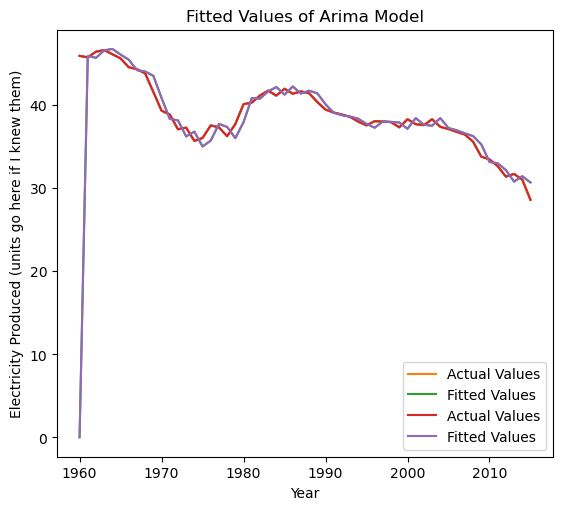

In [144]:
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
import pmdarima as pm
from statsmodels.tsa.arima.model import ARIMA

coal = pd.read_csv("data/coal-production.csv")
coal = coal.reset_index(drop=True)
coal.index = coal.index + 1960
coal['year'] = pd.to_datetime(coal['year'], format='%Y')

fig, ax = plt.subplots()
ax.plot(coal['electricity_prod']);
ax.set_xlabel('Year')
ax.set_ylabel('Electricity Produced (units go here if I knew them)')
plt.title("Electricty Produced from Coal")
print("This data appears to have a negative trend becasue the most amount of electricity produced from coal ranged from the 60s to 70s and although there is a sudden rise of coal produced electricity at the 80s, it continues to decrease afterwords.")

coalVals = coal["electricity_prod"]
def adf_print(time_series):
    adf_output = adfuller(time_series)
    stat = adf_output[0]
    pval = adf_output[1]
    print('ADF Statistic:', stat)
    print('p-value:', pval)
    return None
adf_print(coalVals)
print("Because the p-value is quite large (practically 1), the data is not stationary.")

coalProd = coal["electricity_prod"]
autoModel = pm.auto_arima(coalProd)
autoModel.summary()
print("Model:	SARIMAX(0, 2, 0) was the fastest and simplest arima model using the audo arima.")

fittedCoal = pd.Series(autoModel.predict_in_sample())
plt.plot(coal.index, coal['electricity_prod'], label='Actual Values')
plt.plot(fittedCoal.index, fittedCoal, label='Fitted Values')
plt.xlabel('Year')
plt.ylabel('Electricity Produced (units go here if I knew them)')
plt.title("Fitted Values of Arima Model")
plt.subplots_adjust(top=1)
plt.legend()

fittedCoal = pd.Series(fittedCoal, index=coal.index)
plt.plot(coalProd, label='Actual Values')
plt.plot(fittedCoal, label='Fitted Values')
plt.xlabel('Year')
plt.ylabel('Electricity Produced (units go here if I knew them)')
plt.title("Fitted Values of Arima Model")
plt.subplots_adjust(top=1)
plt.legend()